# Опис проекту

Буде реалізовано симуляцію, де декілька частинок рухаються в 2D-просторі. Частинки матимуть випадкові початкові позиції та швидкості, і будуть рухатись впродовж часу, відбиваючись від стінок контейнера

# Імпорт бібліотек

Для виконання проекту знадобляться numpy та matplotlib

In [11]:
import numpy as np
import matplotlib.pyplot as plt

* **NumPy** для роботи з векторами та матрицями, що спростить обчислення позицій та швидкостей частинок
* **Matplotlib** для візуалізації руху частинок

# Іцініалізація параметрів симуляції

Необхідно визначити кількість частинок, їхні початкові позиції, швидкості та межі контейнера, в якому частинки будуть рухатись

In [12]:
# кількість частинок
num_particles = 10

# границі контейнера (x_min, x_max, y_min, y_max)
container_bounds = np.array([0, 10, 0, 10])

# початкові позиції частинок (випадкові)
positions = np.random.rand(num_particles, 2) * (container_bounds[1::2] - container_bounds[0::2])

# початкові швидкості частинок (випадкові)
velocities = (np.random.rand(num_particles, 2) - 0.5) * 2

print("Initial positions:\n", positions)
print("Initial velocities:\n", velocities)

Initial positions:
 [[7.71208413 4.69758168]
 [9.02659276 3.93989234]
 [3.95192846 2.77454011]
 [6.32656303 6.21914576]
 [6.38447602 0.9665368 ]
 [2.76135463 6.34301564]
 [6.35916896 3.84756169]
 [6.10767989 3.01259988]
 [8.4585076  4.87848242]
 [6.47775822 3.05709412]]
Initial velocities:
 [[ 0.21246471 -0.39793398]
 [ 0.0052992   0.05387511]
 [-0.34827079 -0.6751159 ]
 [-0.28596883 -0.0861883 ]
 [-0.65125424 -0.19155932]
 [ 0.48839652  0.49001519]
 [-0.56466832 -0.627135  ]
 [-0.67638865 -0.42934394]
 [ 0.96598457  0.5297778 ]
 [ 0.51714926  0.40914779]]


* `num_particles` задає кількість частинок
* `container_bounds` визначає межі контейнера
* `positions` - масив, що містить початкові координати частинок у 2D-просторі
* `velocities` - масив, що містить початкові швидкості частинок (випадкові вектори)

# Оновлення позицій частинок

Тепер потрібно написати функцію, яка оновлює позиції частинок на кожному кроці симуляції, враховуючи їхні швидкості та відбивання від стінок контейнера

In [17]:
def update_positions(positions, velocities, bounds):
  # оновлення позицій частинок
  positions += velocities

  # перевірка на зіткнення зі стінками та відбивання
  for i in range(2):
    min_bound, max_bound = bounds[2*i], bounds[2*i + 1]

    # якщо частинка виходить за межі, змінюється напрямок швидкості
    collision_min = positions[:, i] < min_bound
    collision_max = positions[:, i] > max_bound

    velocities[collision_min | collision_max, i] *= -1

    # корекція позицій, щоб частинки не залишали контейнет
    positions[:, i] = np.clip(positions[:, i], min_bound, max_bound)

  return positions, velocities

* `positions += velocities` оновлює позиції частинок згідно із швидкостями
* `np.clip` коригує позиції частинок, щоб вони залишались в межах контейнера
* `collisions_min` та `collisions_max` - маски, що визначають, чи вийшла частинка за межі контейнера. Якщо так, то швидкість частинки змінюється на протилежне, щоб симулювати відбивання від стінок

# Візуалізація симуляції

Тепер можна запустити симуляцію та візуалізувати рух частинок за допомогою `matplotlib`

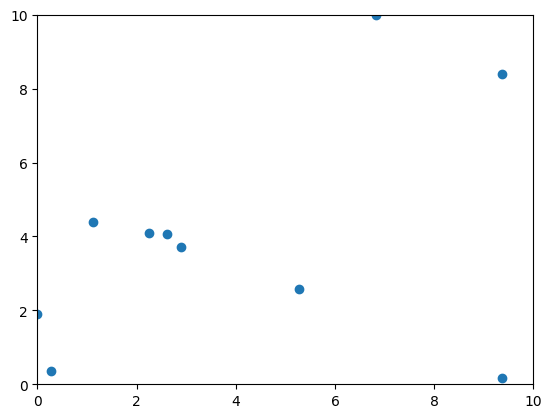

In [21]:
# налаштування графіка
plt.ion() # увімкнення інтерактивного режиму
fig, ax = plt.subplots()
ax.set_xlim(container_bounds[0], container_bounds[1])
ax.set_ylim(container_bounds[2], container_bounds[3])

scat = ax.scatter(positions[:, 0], positions[:, 1])

# симуляція
num_steps = 100

for _ in range(num_steps):
  # оновлення позицій та швидкостей
  positions, velocities = update_positions(positions, velocities, container_bounds)

  # оновлення положення частинок на графіку
  scat.set_offsets(positions)

  # перемалювання
  plt.pause(0.05)

plt.ioff() # вимкнення інтерактивного режиму
plt.show()

* `plt.ion()` та `plt.ioff()` - увімкнення та вимкнення інтерактивного режиму, щоб графік оновлювався без закриття вікна
* `ax.scatter` - створення об'єкта для візуалізації частинок
* `plt.pause(0.05)` - коротка пауза, щоб оновити графік і побачити рух частинок

# Підсумок

Цей проект надає практичний досвід роботи з NumPy для симуляції фізичних процесів. Ви навчилися створювати та оновлювати позиції частинок, реалізовувати зіткнення зі стінками та візуалізувати цей процес. Це дає гарне уявлення про те, як використовувати NumPy для більш складних моделей та симуляцій у наукових дослідженнях і машинному навчанні.